# **Exploratory Data Analysis**

# **Installation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import geopy, sys
from geopy.geocoders import Nominatim
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import sklearn as sklearn

# **Data Import**

In [2]:
air_visits = pd.read_csv("../input/restaurant-visitor-forecasting/train.csv")
air_reservations = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/air_reserve.csv")
air_stores = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/air_store_info.csv")
hpg_reservations = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/hpg_reserve.csv")
hpg_stores = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/hpg_store_info.csv")
store_IDs = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/store_id_relation.csv")
dates = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/date_info.csv")

# **Analysis within Data-set**

**Analyzing 'train.csv'**

1. #visitors-per-day

Text(0, 0.5, '#visitors-per-day')

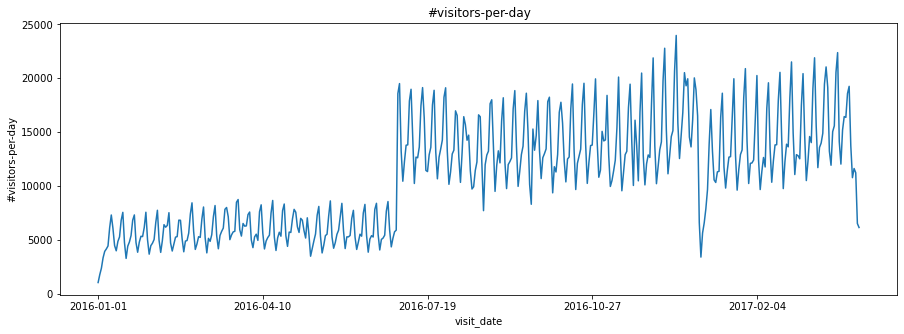

In [3]:
df = pd.DataFrame(air_visits, columns = ["visit_date", "visitors"])
df["#visitors-per-day"] = df.groupby(["visit_date"])["visitors"].transform("sum")
df = df.drop_duplicates(subset = ["visit_date"], keep ='first')
df = df.sort_values(by = ["visit_date"]).reset_index(drop = True)
df.drop(columns = ["visitors"], inplace = True)
# df.sort_values(by = ["visit_date"]).reset_index(drop = True)   
# df.sort_values(by = ["#visitors-per-day"]).reset_index(drop = True)   
# df["#visitors-per-day"].mean()
# df["visit_month"] = df["visit_date"].str.split("-", n = 3, expand = True)[1] 
# df["visit_year"] = df["visit_date"].str.split("-", n = 3, expand = True)[0]
# df[df["visit_year"] == "2017"].min()
df.set_index("visit_date")["#visitors-per-day"].plot(kind = "line", figsize = (15, 5), title = "#visitors-per-day")
plt.xlabel("visit_date")
plt.ylabel("#visitors-per-day")

**Statistics :**
* #visit_date -> 463
* Minimum of visit_date -> 2016-01-01
* Maximum of visit_date -> 2017-04-07 
* Minimum of #visitors-per-day -> 1033 
* Maximum of #visitors-per-day -> 23982 
* Mean of #visitors-per-day -> 10846  

**Inferences :** 
* The first few months of the year 2016 have lesser #visitors-per-day and #visitors-per-day increase thereafter.
* We might have less data for the first few months of the year 2016. It isn't a bad idea to do away with the corresponding data.
* There is an outlier in the month of January.

2. #visitors-per-month-of-year

Text(0, 0.5, '#visitors-per-month-of-year')

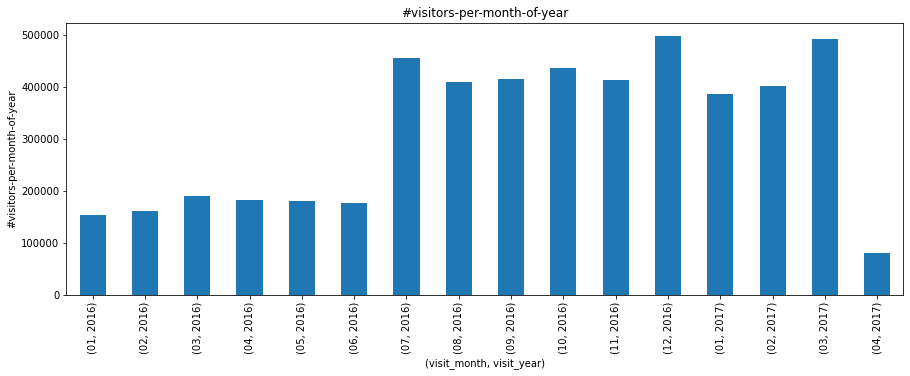

In [4]:
df = pd.DataFrame(air_visits, columns = ["visit_date", "visitors"])
df["visit_month"] = df["visit_date"].str.split("-", n = 3, expand = True)[1] 
df["visit_year"] = df["visit_date"].str.split("-", n = 3, expand = True)[0] 
df["#visitors-per-month-of-year"] = df.groupby(["visit_month", "visit_year"])["visitors"].transform("sum")
df = df.drop_duplicates(subset = ["visit_month", "visit_year"], keep ='first')
df = df.sort_values(by = ["visit_year", "visit_month"]).reset_index(drop = True)
df.drop(columns = ["visit_date", "visitors"], inplace = True)
# df.sort_values(by = ["#visitors-per-month-of-year"]).reset_index(drop = True)   
# df["#visitors-per-month-of-year"].mean()
df.set_index(["visit_month", "visit_year"])["#visitors-per-month-of-year"].plot(kind = "bar", figsize = (15, 5), title = "#visitors-per-month-of-year")
plt.xlabel("(visit_month, visit_year)")
plt.ylabel("#visitors-per-month-of-year")

**Statistics :**
* #(visit_month, visit_year) -> 16
* Minimum of #visitors-per-month-of-year -> 152924 
* Maximum of #visitors-per-month-of-year -> 491229 
* Mean of #visitors-per-month-of-year -> 313865  

**Inferences :** 
* December is the busiest month, followed by August. We are not so sure about March.
* Inconsistency between #visitors-per-month-of-year for the first few months of the year 2016 and 2017.

3. #visitors-per-store

Text(0, 0.5, 'air_store_id')

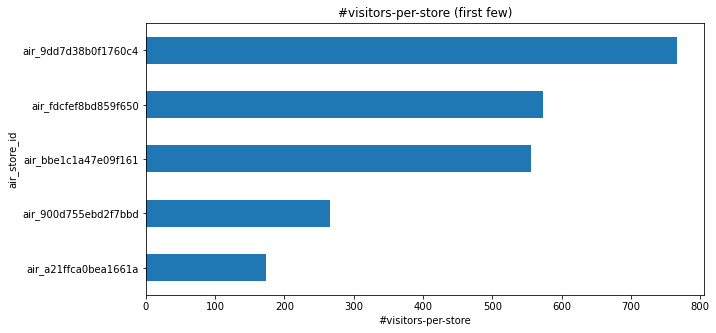

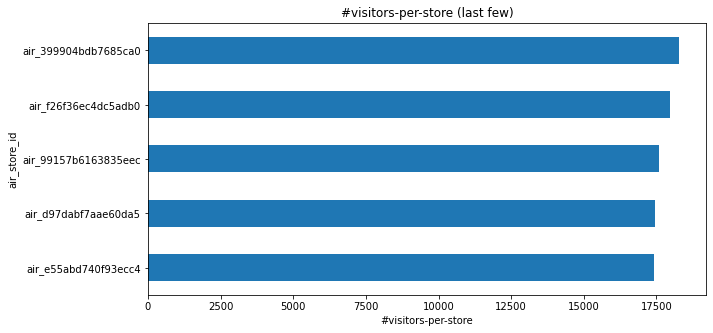

In [5]:
df = pd.DataFrame(air_visits, columns = ["air_store_id", "visitors"])
df["#visitors-per-store"] = df.groupby(["air_store_id"])["visitors"].transform("sum")
df = df.drop_duplicates(subset = ["air_store_id"], keep ='first')
df = df.sort_values(by = ["#visitors-per-store"]).reset_index(drop = True)
df.drop(columns = ["visitors"], inplace = True)
# df.sort_values(by = ["#visitors-per-store"]).reset_index(drop = True)   
# df["#visitors-per-store"].mean()
plt.figure()
df.head().set_index(["air_store_id"])["#visitors-per-store"].plot(kind = "barh", figsize = (10, 5), title = "#visitors-per-store (first few)")
plt.xlabel("#visitors-per-store")
plt.ylabel("air_store_id")
plt.figure()
df.tail().set_index(["air_store_id"])["#visitors-per-store"].plot(kind = "barh", figsize = (10, 5), title = "#visitors-per-store (last few)")
plt.xlabel("#visitors-per-store")
plt.ylabel("air_store_id")

**Statistics :**
* #air_store_id -> 829
* Minimum of #visitors-per-store -> 174 
* Maximum of #visitors-per-store -> 18284 
* Mean of #visitors-per-store -> 6057  

**Inferences :** 
* The air_store_id corresponding to minimum of #visitors-per-store is "air_a21ffca0bea1661a" and that corresponding to maximum of #visitors-per-store is "air_399904bdb7685ca0".	  

**Analyzing 'air_reserve.csv'**

4. #air-reservations-per-day 

Text(0, 0.5, '#air-reservations-per-day')

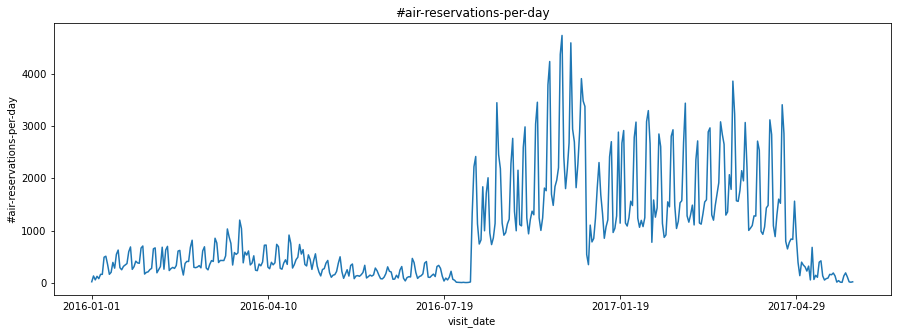

In [6]:
df = pd.DataFrame(air_reservations, columns = ["visit_datetime", "reserve_visitors"])
df["visit_date"] = df["visit_datetime"].str.split(" ", n = 2, expand = True)[0] 
df["#reservations-per-day"] = df.groupby(["visit_date"])["reserve_visitors"].transform("sum")
df = df.drop_duplicates(subset = ["visit_date"], keep ='first')
df = df.sort_values(by = ["visit_date"]).reset_index(drop = True)
df.drop(columns = ["visit_datetime", "reserve_visitors"], inplace = True)
# df.sort_values(by = ["visit_date"]).reset_index(drop = True)   
# df.sort_values(by = ["#reservations-per-day"]).reset_index(drop = True)   
# df["#reservations-per-day"].mean()
df.set_index("visit_date")["#reservations-per-day"].plot(kind = "line", figsize = (15, 5), title = "#air-reservations-per-day")
plt.xlabel("visit_date")
plt.ylabel("#air-reservations-per-day")

**Statistics :**
* #visit_date -> 433
* Minimum of visit_date -> 2016-01-01
* Maximum of visit_date -> 2017-05-31 
* Minimum of #reservations-per-day -> 2 
* Maximum of #reservations-per-day -> 4742 
* Mean of #reservations-per-day -> 956  

**Inferences :**
* The first few months of the year 2016 have lesser #air-reservations-per-day, #air-reservations-per-day increase thereafter.
* We might have less data for the first few months of the year 2016. It isn't a bad idea to do away with the corresponding data.
* There is an outlier in the month of January.
* We have data corresponding to the dates we plan to test upon in the end.
* The #air-reservations-per-day decrease in May, 2017 which is consistent with what was observed for May, 2016. 

5. #air-reservations-per-hour-of-day

Text(0.5, 1.0, '#air-reservations-per-hour-of-day')

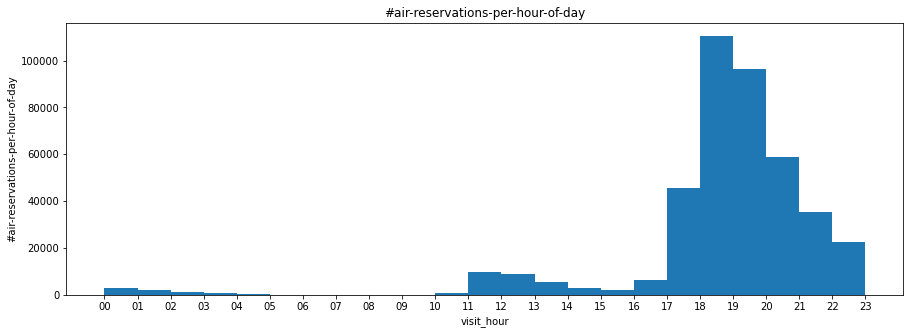

In [7]:
df = pd.DataFrame(air_reservations, columns = ["visit_datetime", "reserve_visitors"])
df["visit_time"] = df["visit_datetime"].str.split(" ", n = 2, expand = True)[1]
df["visit_hour"] = df["visit_time"].str.split(":", n = 3, expand = True)[0]
df["#reservations-per-hour-of-day"] = df.groupby(["visit_hour"])["reserve_visitors"].transform("sum")
df = df.sort_values(by = ["visit_hour"]).reset_index(drop = True)
df.drop(columns = ["visit_datetime", "visit_time"], inplace = True)
plt.figure(figsize = (15, 5))
plt.hist(df.visit_hour, weights = df["reserve_visitors"], bins = 23)
plt.xlabel("visit_hour")
plt.ylabel("#air-reservations-per-hour-of-day")
plt.title("#air-reservations-per-hour-of-day")
# df = df.drop_duplicates(subset = ["visit_hour"], keep ='first')
# df.drop(columns = ["reserve_visitors"], inplace = True)
# df.sort_values(by = ["#reservations-per-hour-of-day"]).reset_index(drop = True)   
# df["#reservations-per-hour-of-day"].mean()

**Statistics :**
* #visit_hour -> 24
* Minimum of #reservations-per-hour-of-day -> 38 
* Maximum of #reservations-per-hour-of-day -> 110467 
* Mean of #reservations-per-hour-of-day -> 17251  

**Inferences :** 
* The closing hours are between 5 AM and 10 AM.
* The #reservations-per-hour-of-day increase during lunch-timer and dinner-time.
* There is an evening rush-hour, during which people tend to make more reservations; 6 PM to 8 PM is the peak time.
* There are few restaurants that run at night.

6. #air-reservations-per-store  

Text(0, 0.5, 'air_store_id')

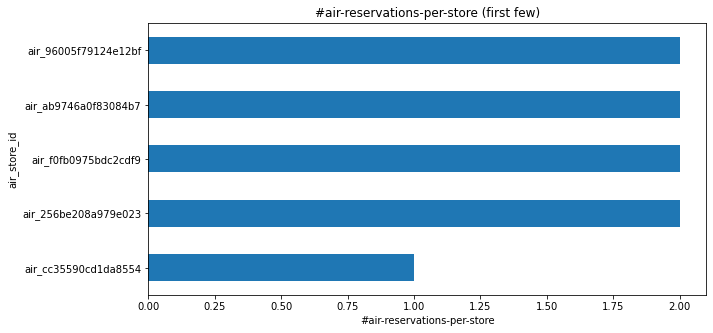

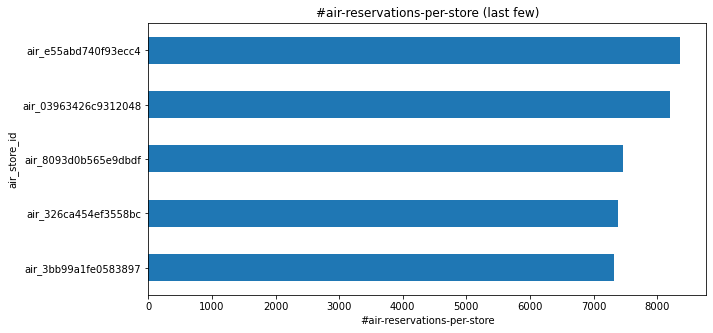

In [8]:
df = pd.DataFrame(air_reservations, columns = ["air_store_id", "reserve_visitors"])
df["#reservations-per-store"] = df.groupby(["air_store_id"])["reserve_visitors"].transform("sum")
df = df.drop_duplicates(subset = ["air_store_id"], keep ='first')
df = df.sort_values(by = ["#reservations-per-store"]).reset_index(drop = True)
df.drop(columns = ["reserve_visitors"], inplace = True)
# df.sort_values(by = ["#reservations-per-store"]).reset_index(drop = True)   
# df["#reservations-per-store"].mean()
plt.figure()
df.head().set_index(["air_store_id"])["#reservations-per-store"].plot(kind = "barh", figsize = (10, 5), title = "#air-reservations-per-store (first few)")
plt.xlabel("#air-reservations-per-store")
plt.ylabel("air_store_id")
plt.figure()
df.tail().set_index(["air_store_id"])["#reservations-per-store"].plot(kind = "barh", figsize = (10, 5), title = "#air-reservations-per-store (last few)")
plt.xlabel("#air-reservations-per-store")
plt.ylabel("air_store_id")

**Statistics :**
* #air_store_id -> 314
* Minimum of #air-reservations-per-store -> 1 
* Maximum of #air-reservations-per-store -> 8355 
* Mean of #air-reservations-per-store -> 1318  

**Inferences :** 
* The air_store_id corresponding to minimum of #visitors-per-store is "air_cc35590cd1da8554" and that corresponding to maximum of #visitors-per-store is "air_e55abd740f93ecc4".
* Some air_stores take close to about zero reservations and so, we might as well not consider the corresponding reservation-data in order to make predictions for such stores.
* The air_store_id corresponding to the maximum of #air-reservations-per-store don't match and so, it can be concluded that not every reservation made gets converted into a visit.

7. #air-reservations-per-difference-in-timings 

Text(0, 0.5, '#reservations-per-difference-in-timings')

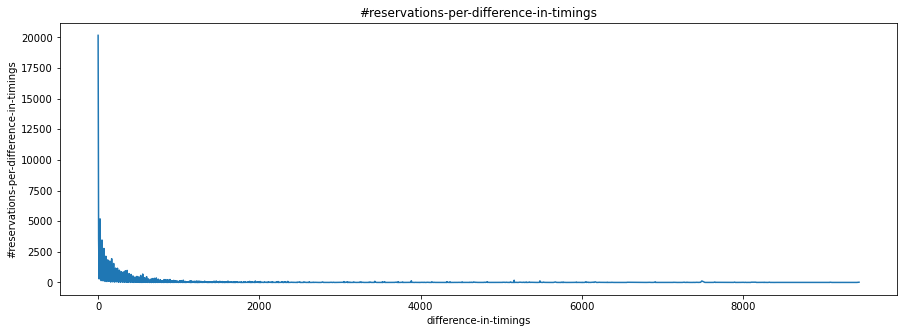

In [9]:
df = pd.DataFrame(air_reservations, columns = ["visit_datetime", "reserve_datetime", "reserve_visitors"])
df["visit_datetime"] = pd.to_datetime(df["visit_datetime"])
df["reserve_datetime"] = pd.to_datetime(df["reserve_datetime"])                                        
df["difference-in-timings"] = (df["visit_datetime"] - df["reserve_datetime"]).astype("timedelta64[h]")
df["#reservations-per-difference-in-timings"] = df.groupby(["difference-in-timings"])["reserve_visitors"].transform("sum")
df = df.sort_values(by = ["difference-in-timings"]).reset_index(drop = True)
df = df.drop_duplicates(subset = ["difference-in-timings"], keep ='first')
df.drop(columns = ["visit_datetime", "reserve_datetime", "reserve_visitors"], inplace = True)
# df.sort_values(by = ["difference-in-timings"]).reset_index(drop = True)   
# df.sort_values(by = ["#reservations-per-difference-in-timings"]).reset_index(drop = True)   
df.set_index("difference-in-timings")["#reservations-per-difference-in-timings"].plot(kind = "line", figsize = (15, 5), title = "#reservations-per-difference-in-timings")
plt.xlabel("difference-in-timings")
plt.ylabel("#reservations-per-difference-in-timings")

**Statistics :**
* Minimum of difference-in-timings -> 0 hours
* Maximum of difference-in-timings -> 1 year, 23 days, 3 hours
* Mode of difference-in-timings -> 0 hours 

**Inferences :** 
* difference-in-timings beyond two months doesn't seem to be of much value.
* As the minimum of difference-in-timings is zero, most people are not really reserving, they're just signing away their names and walking in.
* Usually, people don't make reservations over long stretches of time. 

**Analyzing 'air_store_info.csv'**

8. #air-stores-per-area

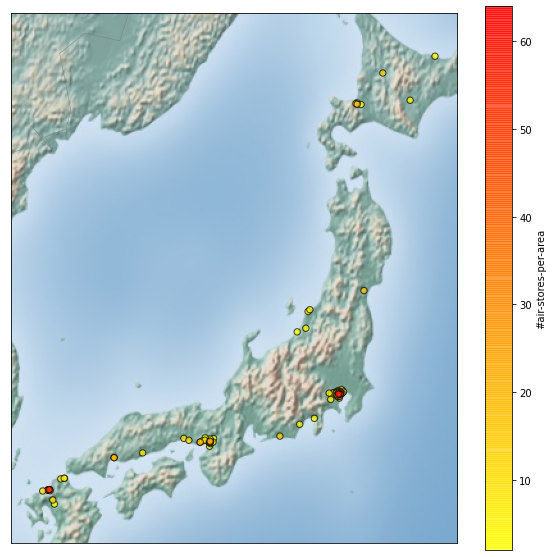

In [10]:
df = pd.DataFrame(air_stores, columns = ["air_store_id", "air_area_name", "longitude", "latitude"])
df["#stores-per-area"] = df.groupby(["air_area_name"])["air_store_id"].transform("nunique")
df = df.drop_duplicates(subset = ["air_area_name"], keep ='first')
df = df.sort_values(by = ["#stores-per-area"]).reset_index(drop = True)
df.drop(columns = ["air_store_id"], inplace = True)
# df.sort_values(by = ["#stores-per-area"]).reset_index(drop = True)   
# df["#stores-per-area"].mean()
llcrnrlon = df["longitude"].min() - 1
llcrnrlat = df["latitude"].min() - 1
urcrnrlon = df["longitude"].max() + 1
urcrnrlat = df["latitude"].max() + 1
fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = "lcc", lon_0 = llcrnrlon, lat_0 = llcrnrlat, llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat, urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat)
m.shadedrelief()
m.drawcountries(color = "gray")
m.drawstates(color = "gray")
longitudes = df["longitude"].to_list()
latitudes = df["latitude"].to_list()
m.scatter(longitudes, latitudes, latlon = True, c = df["#stores-per-area"], s = 40, cmap = "autumn_r", edgecolor = "black", alpha = 0.75)
plt.colorbar(label = "#air-stores-per-area")

Text(0, 0.5, 'air_area_name')

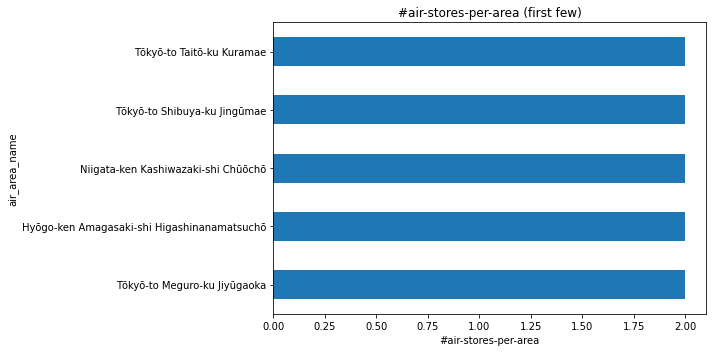

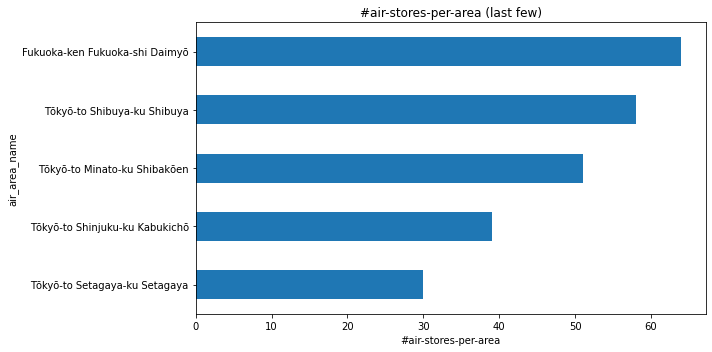

In [11]:
df = pd.DataFrame(air_stores, columns = ["air_store_id", "air_area_name"])
df["#stores-per-area"] = df.groupby(["air_area_name"])["air_store_id"].transform("nunique")
df = df.drop_duplicates(subset = ["air_area_name"], keep ='first')
df = df.sort_values(by = ["#stores-per-area"]).reset_index(drop = True)
df.drop(columns = ["air_store_id"], inplace = True)
# df.sort_values(by = ["#stores-per-area"]).reset_index(drop = True)
plt.figure(tight_layout = True)
df.head().set_index(["air_area_name"])["#stores-per-area"].plot.barh(figsize = (10, 5), title = "#air-stores-per-area (first few)")
plt.xlabel("#air-stores-per-area")
plt.ylabel("air_area_name")
plt.figure(tight_layout = True)
df.tail().set_index(["air_area_name"])["#stores-per-area"].plot.barh(figsize = (10, 5), title = "#air-stores-per-area (last few)")
plt.xlabel("#air-stores-per-area")
plt.ylabel("air_area_name")

**Statistics :**
* #air_area_name -> 103
* Minimum of #air-stores-per-area -> 2 
* Maximum of #air-stores-per-area -> 64 
* Mean of #air-stores-per-area -> 8  

**Inferences :**
* The restaurant-hubs are centered and spread out radially.
* The #air-stores-per-area and #genre-per-area are directly related.
* Fukuoka-ken Kitakyūshū-shi Konyamachi has less stores but more visits whereas Fukuoka-ken Fukuoka-shi Daimyō has more stores but less visits. So, it looks like the local competition has an adverse effect. 

9. #air-stores-per-genre

Text(0, 0.5, 'air_genre_name')

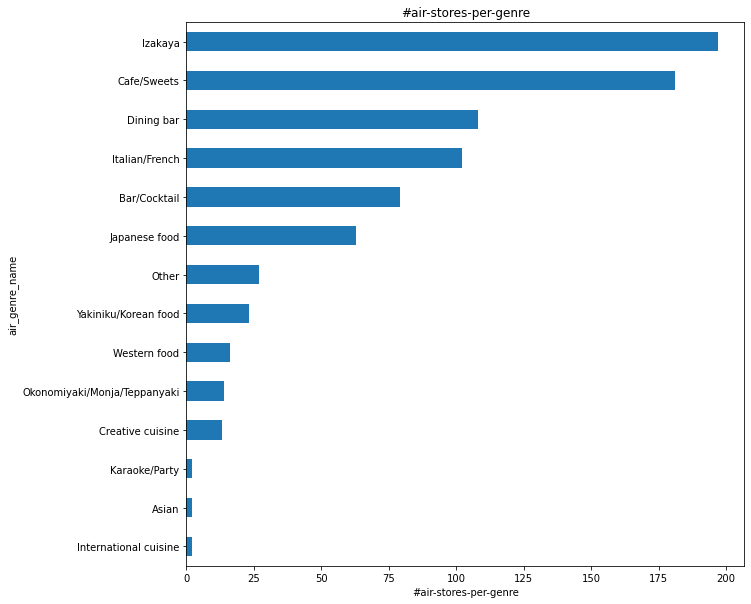

In [12]:
df = pd.DataFrame(air_stores, columns = ["air_store_id", "air_genre_name"])
df["#stores-per-genre"] = df.groupby(["air_genre_name"])["air_store_id"].transform("nunique")
df = df.drop_duplicates(subset = ["air_genre_name"], keep ='first')
df = df.sort_values(by = ["#stores-per-genre"]).reset_index(drop = True)
df.drop(columns = ["air_store_id"], inplace = True)
# df.sort_values(by = ["#stores-per-genre"]).reset_index(drop = True)   
# df["#stores-per-genre"].mean()
df.set_index(["air_genre_name"])["#stores-per-genre"].plot.barh(figsize = (10, 10), title = "#air-stores-per-genre")
plt.xlabel("#air-stores-per-genre")
plt.ylabel("air_genre_name")

**Statistics :**
* #air_genre_name -> 14
* Minimum of #air-stores-per-genre -> 2 
* Maximum of #air-stores-per-genre -> 197 
* Mean of #air-stores-per-genre -> 59  

**Inferences :** 
* The genre "Izakaya" corresponds to the highest #air-stores-per-genre and the genre "International cuisine" corresponds to the lowest #air-stores-per-genre. 

10. #genre-per-area

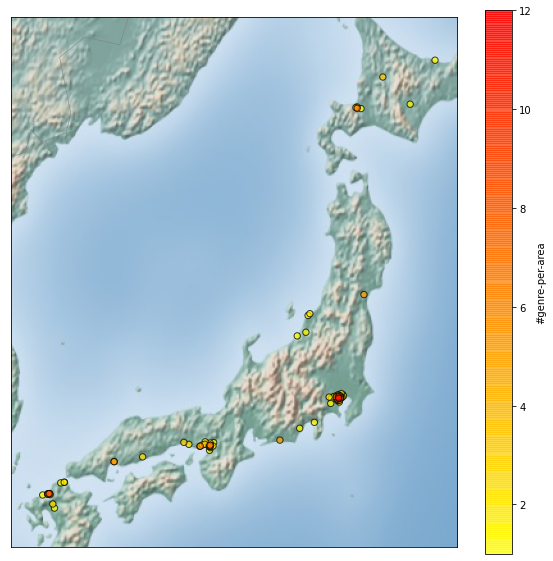

In [13]:
df = pd.DataFrame(air_stores, columns = ["air_genre_name", "air_area_name", "longitude", "latitude"])
df["#genre-per-area"] = df.groupby(["air_area_name"])["air_genre_name"].transform("nunique")
df = df.drop_duplicates(subset = ["air_area_name"], keep ='first')
df = df.sort_values(by = ["#genre-per-area"]).reset_index(drop = True)
df.drop(columns = ["air_genre_name"], inplace = True)
# df.sort_values(by = ["#genre-per-area"]).reset_index(drop = True)   
# df["#genre-per-area"].mean()
llcrnrlon = df["longitude"].min() - 1
llcrnrlat = df["latitude"].min() - 1
urcrnrlon = df["longitude"].max() + 1
urcrnrlat = df["latitude"].max() + 1
fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = "lcc", lon_0 = llcrnrlon, lat_0 = llcrnrlat, llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat, urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat)
m.shadedrelief()
m.drawcountries(color = "gray")
m.drawstates(color = "gray")
longitudes = df["longitude"].to_list()
latitudes = df["latitude"].to_list()
m.scatter(longitudes, latitudes, latlon = True, c = df["#genre-per-area"], s = 40, cmap = "autumn_r", edgecolor = "black", alpha = 0.75)
plt.colorbar(label = "#genre-per-area")

Text(0, 0.5, '#genre-per-area')

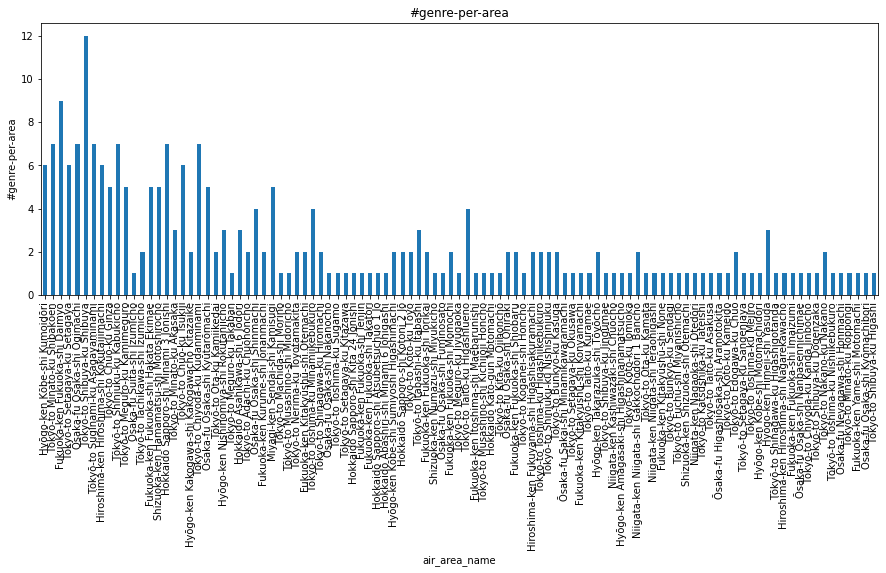

In [14]:
df = pd.DataFrame(air_stores, columns = [ "air_genre_name", "air_area_name"])
df = df.drop_duplicates(subset = ["air_area_name", "air_genre_name"], keep ='first')
df["#genre-per-area"] = df.groupby(["air_area_name"])["air_genre_name"].transform("nunique")
df = df.drop_duplicates(subset = ["air_area_name"], keep ='first')
df.drop(columns = ["air_genre_name"], inplace = True)
# df.sort_values(by = ["#genre-per-area"]).reset_index(drop = True)   
# df["#genre-per-area"].mean()
df.set_index(["air_area_name"])["#genre-per-area"].plot(kind = "bar", figsize = (15, 5), title = "#genre-per-area")
plt.xlabel("air_area_name")
plt.ylabel("#genre-per-area")

**Statistics :**
* Minimum of #genre-per-area -> 1 
* Maximum of #genre-per-area -> 12 
* Mean of #genre-per-area -> 2   

**Inferences :** 
* The #air-stores-per-area and #genre-per-area are directly related, as can be seen from the bar-plots and from the maps.

**Analyzing 'date_info.csv'**

12. #holidays versus #non-holidays

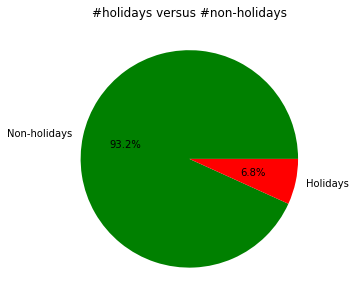

In [15]:
df = pd.DataFrame(dates, columns = ["holiday_flg"])
labels = ["Non-holidays", "Holidays"]
colors = ["green", "red"]
values = df["holiday_flg"].value_counts().values
plt.figure(figsize = (5, 5))
plt.pie(values, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("#holidays versus #non-holidays")
plt.show()

# **Analysis across Data-sets**

**Creating 'air_info.csv' comprised of 'train.csv', 'date_info.csv' and 'air_store_info.csv'**

In [16]:
air_info = air_visits.copy()
date_info = dates.copy()
air_info["day_of_week"] = air_info["visit_date"].apply(lambda x: str(date_info.loc[date_info["calendar_date"] == x]["day_of_week"].to_list()[0]))
air_info["holiday_flg"] = air_info["visit_date"].apply(lambda x: date_info.loc[date_info["calendar_date"] == x]["holiday_flg"].to_list()[0])
air_info["genre"] = air_info["air_store_id"].apply(lambda x: str(air_stores.loc[air_stores["air_store_id"] == x]["air_genre_name"].to_list()[0]))
air_info["area"] = air_info["air_store_id"].apply(lambda x: str(air_stores.loc[air_stores["air_store_id"] == x]["air_area_name"].to_list()[0]))
air_info.to_csv("air_info.csv", index = False)
# air_info

**Analyzing 'train.csv' and 'date_info.csv'**

13. #air-visitors-per-day-of-week

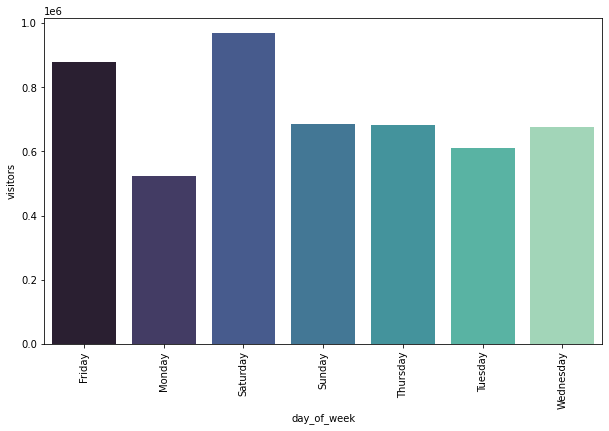

In [17]:
visitors_per_day_of_week = air_info[["day_of_week","visitors"]].groupby("day_of_week", as_index = False).sum()
plt.figure(figsize = (10, 6))
plt.xticks(rotation = 90)
sns.barplot(data = visitors_per_day_of_week, x = "day_of_week", y = "visitors",palette="mako")

**Inferences :** 
* On Friday and Saturday, restaurants have the most number of visitors.
* To our surprise, Sunday being a weekend doesn't have more number of visitors than most weekdays.
* Monday has least #visitors.
* Other weekdays perform more or less the same.

14. #air-visitors-per-holiday/non-holiday

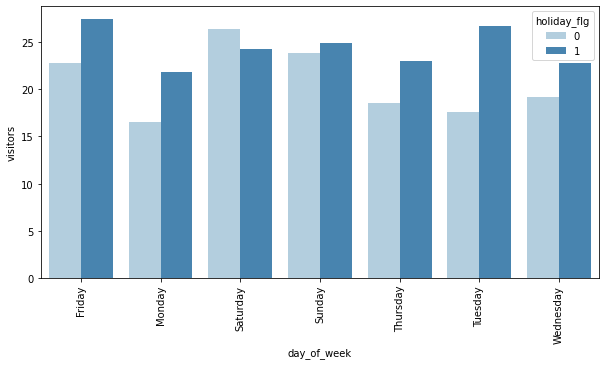

In [18]:
air_info.holiday_flg = air_info.holiday_flg.astype('str')
visitors_per_day_of_week = air_info.groupby(["day_of_week","holiday_flg"], as_index = False).mean()
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 90)
sns.barplot(data = visitors_per_day_of_week, x = "day_of_week", y = "visitors", hue = "holiday_flg",palette="Blues")

**Inferences :** 
* We have taken mean to account for very less number of holidays.
* People generally visit restaurants more on holidays.
* Weekend being a holiday doesn’t impact the number of visitors much.
* Immediately after a weekend, if there's a holiday on a weekday, people tend to visit the restaurant more! ‘Cause it's an extended weekend, why not!

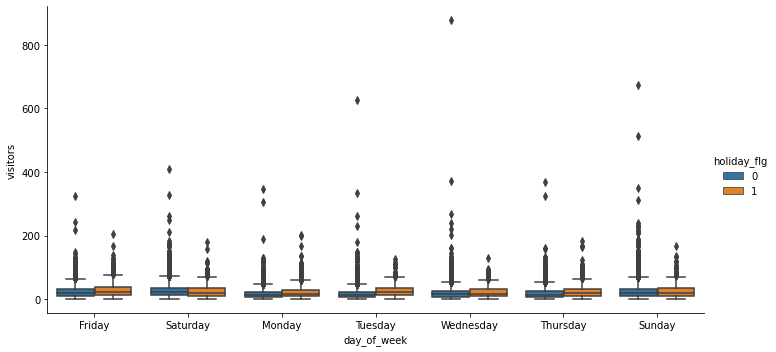

In [19]:
sns.catplot(x = 'day_of_week', y = 'visitors', hue = "holiday_flg", kind = "box", data = air_info, aspect = 2)

**Inferences :** 
* From boxplots, we can infer that there are a lot of outliers.

**Analyzing 'air_reserve.csv' and 'date_info.csv'** 

15. #air-reservations-per-holiday/non-holiday

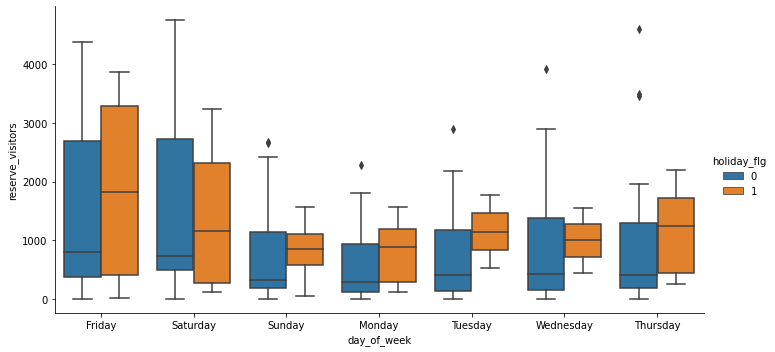

In [20]:
df = air_reservations.copy()
df["visit_date"] = df["visit_datetime"].str.split(" ", n = 2, expand = True)[0] 
reserve_visitors_df = df.groupby("visit_date", as_index = False).sum()
reserve_visitors_df[["day_of_week", "holiday_flg"]] = dates[["day_of_week", "holiday_flg"]]
sns.catplot(x = 'day_of_week', y = 'reserve_visitors', hue = "holiday_flg", kind = "box", data = reserve_visitors_df, aspect = 2).set_titles("reservations depending on day_of_week")

**Inferences :** 
* Saturday has the highest #reservations on a non-holiday while Friday has the highest #reservations on a holiday.
* The orange boxplot is almost always greater than the blue one, this implies that #reservations are more on holidays as compared to non-holidays.

**Analyzing 'train.csv', 'date_info.csv' and 'air_store_info.csv'** 

16. #air-visitors-per-genre-per-day-of-week

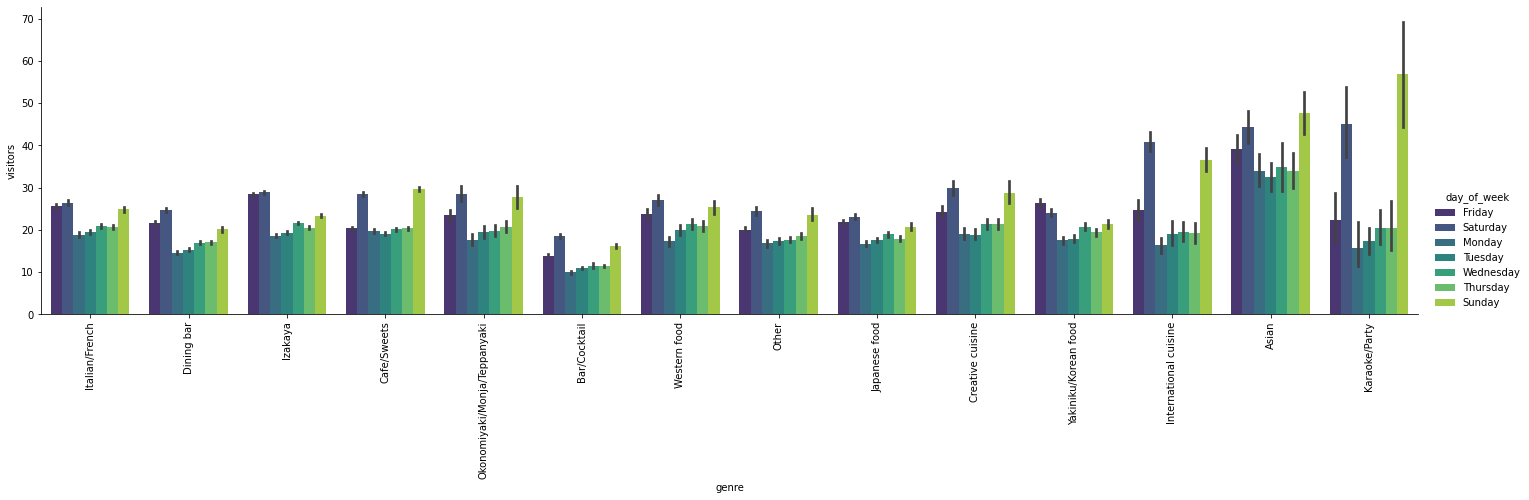

In [21]:
sns.catplot(x = 'genre', y = 'visitors', hue = "day_of_week", kind = "bar", data = air_info, aspect = 4, palette = 'viridis').set_xticklabels(rotation = 90)

**Inferences :** 
* For any given day of the week, Bar/Cocktail is the least preferred cuisine while Asian is the most preferred cuisine.
* Friday, Saturday and Sunday are the most preferred days for all the cuisines.
* All cuisines have similar #visitors for the weekdays.
* Specific inferences can also be made. For example, Karaoke/Party is most preferred on weekends and Asian on weekdays.
* There is a lot of weekday-weekend variance for cuisines like International Cuisine and Karaoke/Party.

**Analyzing 'train.csv' and 'air_store_info.csv'** 

17. #air-visitors-per-genre

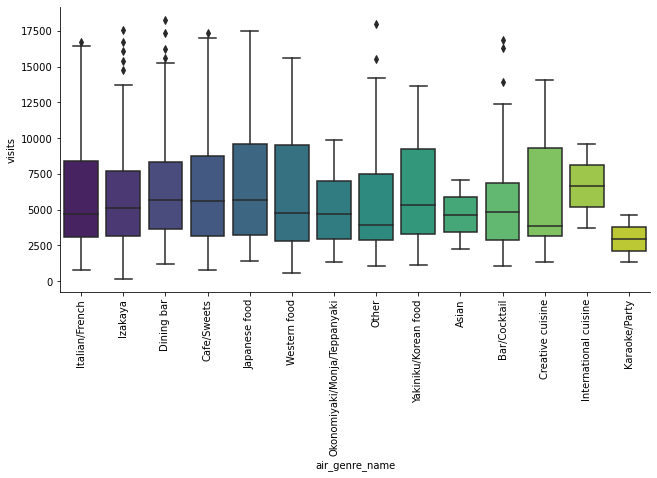

In [22]:
df = air_visits.groupby("air_store_id", as_index = False).sum()
df.sort_values(by = "air_store_id", inplace = True)
df_stores = air_stores.sort_values(by = "air_store_id")
df_stores["visits"] = df["visitors"]
sns.catplot(x = 'air_genre_name', y = 'visits', kind = "box", data = df_stores, aspect = 2, palette = 'viridis',height=4.7).set_xticklabels(rotation=90)

**Inferences :** 
* There are outliers for a few cuisines
* Cafe/Sweets and Japanese food have the highest median number of visitors.

18. #air-visitors-per-area

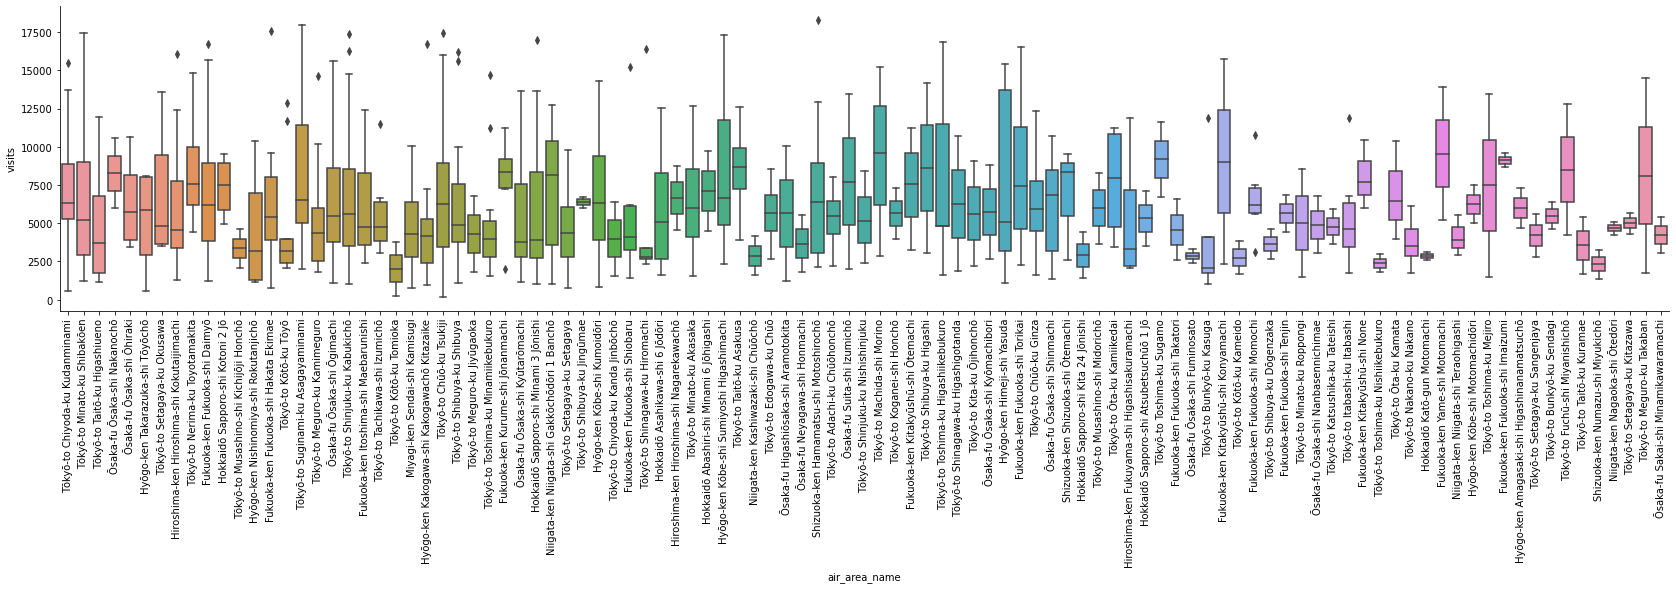

In [23]:
sns.catplot(x = 'air_area_name', y = 'visits', kind = "box", data = df_stores, aspect = 5).set_xticklabels(rotation=90)

**Inferences :** 
* There are outliers for a few cuisines
* Cafe/Sweets and Japanese food have the highest median number of visitors.

19. #air-visitors-per-genre-per-area

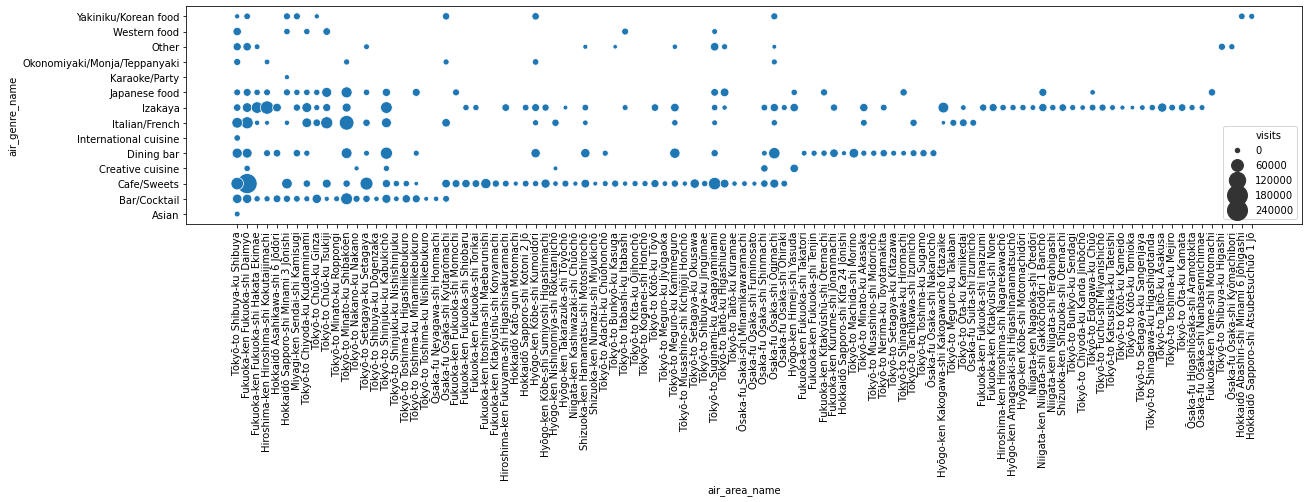

In [24]:
df_area_genre = df_stores[["air_genre_name", "air_area_name", "visits"]].groupby(["air_genre_name", "air_area_name"], as_index = False).sum()
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 90)
sns.scatterplot(data = df_area_genre, x = "air_area_name", y = "air_genre_name", size = "visits", sizes = (20, 400))

**Inferences :** 
* As we move from left to right, the variability of genre in a particular area decreases.
* Along with the variability, the number of visitors also decrease.

**Now comparing with #air-stores-per-genre-per-area...** 

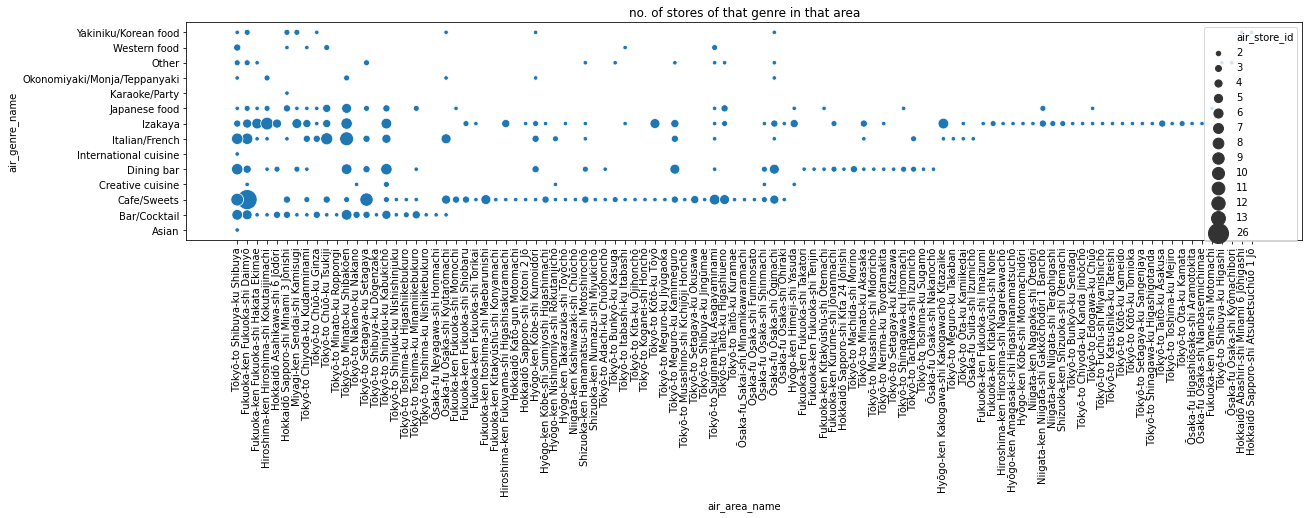

In [25]:
df_area_genre = df_stores[["air_genre_name", "air_area_name", "air_store_id"]].groupby(["air_genre_name", "air_area_name"], as_index = False).count()
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 90)
plt.title("no. of stores of that genre in that area")
sns.scatterplot(data = df_area_genre, x = "air_area_name", y = "air_genre_name", size = "air_store_id", sizes = (20, 400), legend = "full")

**Inferences :** 
* For areas with two or more most-popular genres, one will visit the other if he visits one.
* For example, Fukuoka-ken Fukuoka-shi Daimyō has the highest number of Cafe/Sweet and Italian/French shops. Stores in those areas might have similar numbers of visitors.
* As we are moving from left to right, variability of genre in that area is decreasing.
* Based on area, we’d concluded that more visits for less stores for that area. But as we bring in the cuisine factor, number of stores correspond to number of visitors.

**Analyzing 'train.csv' and 'air_reserve.csv'** 

20. #air-visitors-per-store versus #air-reservations-per-store

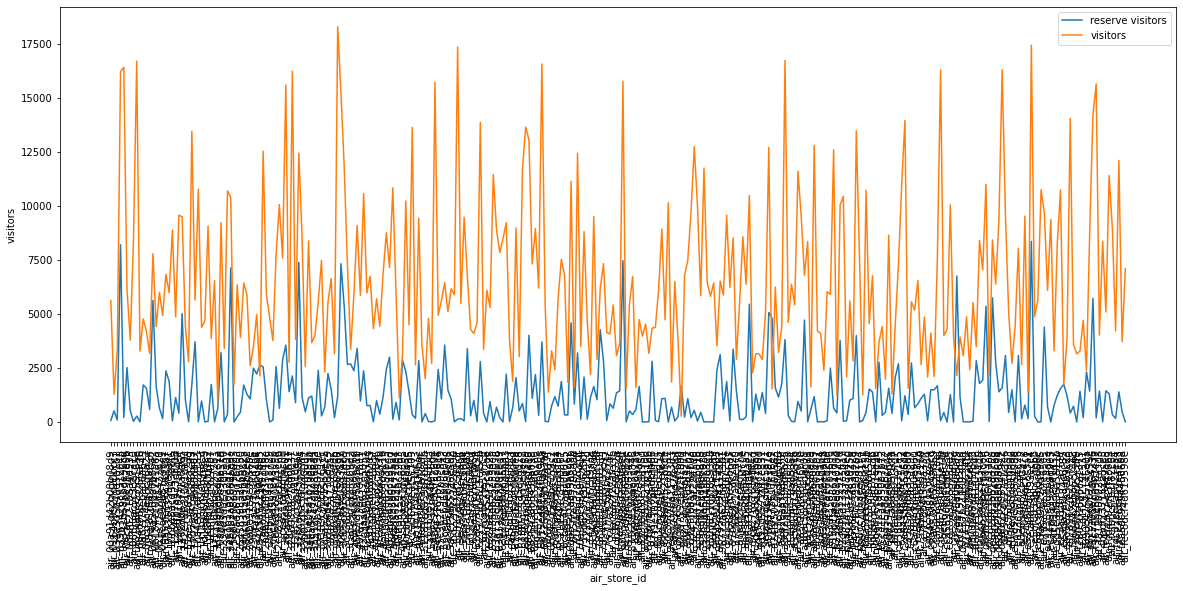

In [26]:
df1 = air_reservations.copy()
reserve_visitors = df1.groupby("air_store_id").sum()
df2 = air_visits.copy()
visitors = df2.groupby("air_store_id", as_index = False).sum()
dataset = pd.merge(visitors, reserve_visitors, on = "air_store_id")
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 90)
sns.lineplot(data = dataset, x = "air_store_id", y = "reserve_visitors", label = 'reserve visitors')
sns.lineplot(data = dataset, x = "air_store_id", y = "visitors", label = 'visitors')
# print(air_reservations["air_store_id"].nunique())
# print(air_visits["air_store_id"].nunique())
# print("The store with the max. no. of visitors is: " + str(visitors.max()["air_store_id"]))
# print("The store with the min. no. of visitors is: " + str(visitors.min()["air_store_id"]))

**Statistics :** 
* #air-stores-in-air-reservation -> 314
* #air-stores-in-air-visits -> 829 
* Store corresponding to maximum of #air-visitors-per-store -> air_fff68b929994bfbd
* Store corresponding to minimum of #air-visitors-per-store -> air_00a91d42b08b08d9

**Inferences :** 
* We have reservation data for 314 restaurants and are comparing the number of visitors and the number of reservations for each of these restaurants.
* For almost all the restaurants, the mean number of 'reserved_visitors' is greater than 'visitors'.
* For some stores, reservations and visits match => those stores accept visitors only based on reservations.
* Some stores have 0 reservations as there are a lot of dips in the graph of reservations => these stores are mostly walk-in stores.
* Some reservations are more than visits => that particular store has less probability of reservations getting converted to visits.

21. mean-ratio of #air-visitors-per-store to #air-reservations-per-store

count     314.000000
mean      205.343044
std       610.890389
min         0.157490
25%         2.758402
50%         6.610426
75%        41.255925
max      5873.000000
Name: ratio, dtype: float64

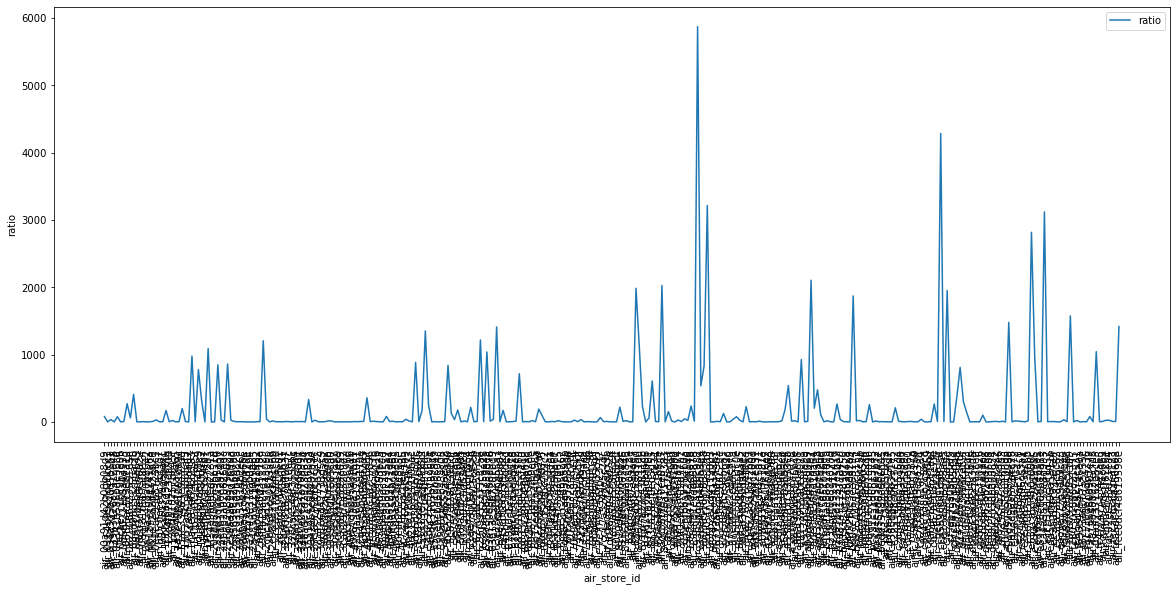

In [27]:
dataset["ratio"] = dataset["visitors"]/dataset["reserve_visitors"]
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.lineplot(data=dataset, x="air_store_id", y="ratio", label='ratio')
dataset["ratio"].describe()

**Inferences :** 
* Ratio max = 6000, mean = 205 => outlier.
* The peaks are the outliers. Everything above thousand can be considered an outlier. Mean ratio of visitors to reserve_visitors is around 200. Therefore, this ratio can be used to fill in the reserve_data for missing restaurants. Multiply visits by this number and average it over 365 days.

22. #air-visitors-per-day versus #air-reservations-per-day

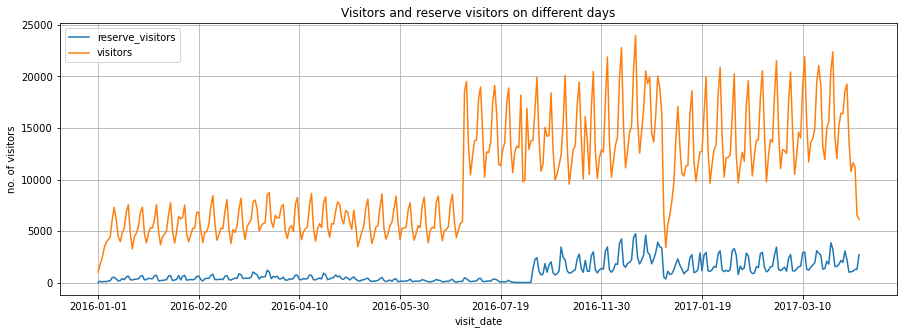

In [28]:
df1 = air_visits.copy()
visitors = df1.groupby("visit_date", as_index = False).sum()
df2 = air_reservations.copy()
df2["visit_date"] = df2["visit_datetime"].str.split(" ", n = 2, expand = True)[0] 
reserve_visitors = df2.groupby("visit_date", as_index = False).sum()
dataset = pd.merge(reserve_visitors, visitors, on = "visit_date")
dataset.set_index("visit_date").plot(kind = "line", figsize = (15, 5), title = "Visitors and reserve visitors on different days", ylabel = "no. of visitors", grid = True)
# print("The day with the max. no. of visitors is: " + str(visitors.max()["visit_date"]))
# print("The day with the min. no. of visitors is: " + str(visitors.min()["visit_date"]))

**Statistics :** 
* Date corresponding to maximum of #air-visitors-per-day -> 2017-04-07
* Date corresponding to minimum of #air-visitors-per-day -> 2016-01-01

**Analyzing 'train.csv', 'hpg_reserve.csv' and 'store_id_relation.csv'** 

23. #air-visitors-per-day versus #hpg-reservations-per-day

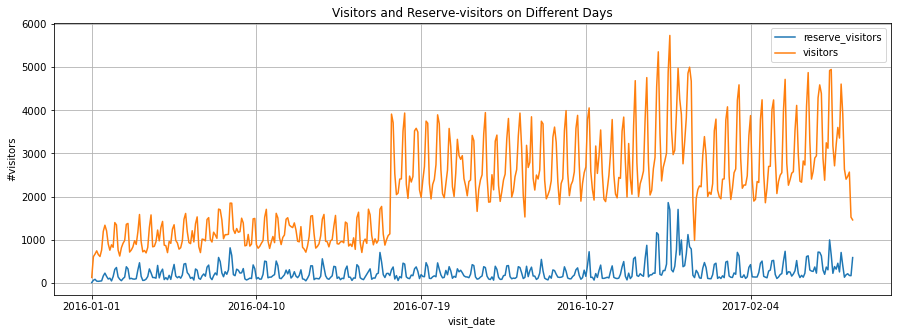

In [29]:
df1 = store_IDs.copy()
df1.set_index('air_store_id', drop = True, inplace = True)
dict1 = df1.to_dict()
dict2 = dict1['hpg_store_id']
df2 = air_visits.copy()
df2.replace({"air_store_id": dict2}, inplace = True)
data_filtered = df2['air_store_id'].str.startswith('hpg')
df3 = df2[data_filtered]
df3 = df3.rename(columns = {"air_store_id" : "hpg_store_id"})
visitors = df3.groupby(["visit_date"], as_index = False).sum()
df4 = hpg_reservations.copy()
yes = df3['hpg_store_id']
df4["visit_date"] = df4["visit_datetime"].str.split(" ", n = 2, expand = True)[0]
vals = df4.hpg_store_id.isin(yes)
df4 = df4[vals]
reserve_visitors = df4.groupby(["visit_date"], as_index = False).sum()
dataset = pd.merge(reserve_visitors, visitors, on = "visit_date")
dataset.set_index("visit_date").plot(kind = "line", figsize = (15, 5), title = "Visitors and Reserve-visitors on Different Days", ylabel = "#visitors", grid = True)

**Now comparing hpg-reservations and air-reservations...** 

**Inferences :** 
* For stores that are present in both hpg and air reserve data, Jan 2016 to July 2016, both the data almost overlaps. But from Aug 2016,  hpg reservations are actually more.
* So taking hpg reservations will give us more data for the same.

24. #hpg-visits-per-genre

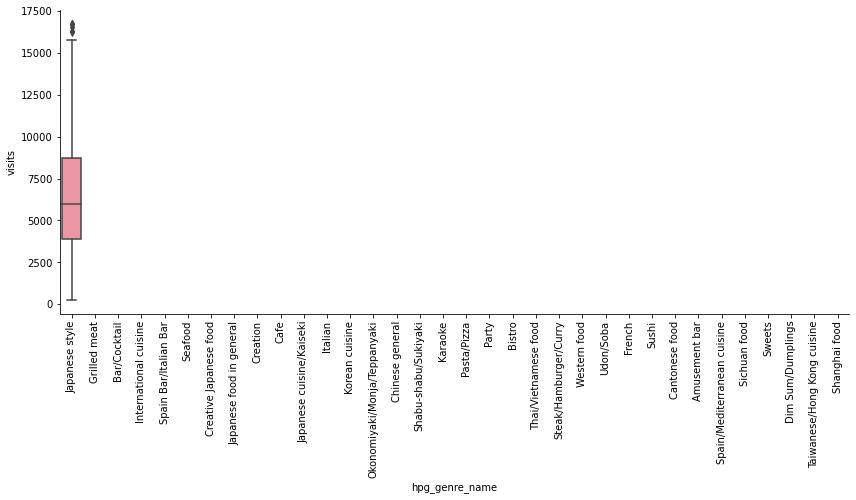

In [30]:
df = df3.groupby("hpg_store_id", as_index = False).sum()
df.sort_values(by = "hpg_store_id", inplace = True)
df_stores = hpg_stores.sort_values(by = "hpg_store_id")
df_stores["visits"] = df["visitors"]
sns.catplot(x = 'hpg_genre_name', y = 'visits', kind = "box", data = df_stores, aspect = 2.5).set_xticklabels(rotation=90)

**Inferences :** 
* The 150 common stores all have Japanese cuisine.

25. #hpg-visits-per-genre-area

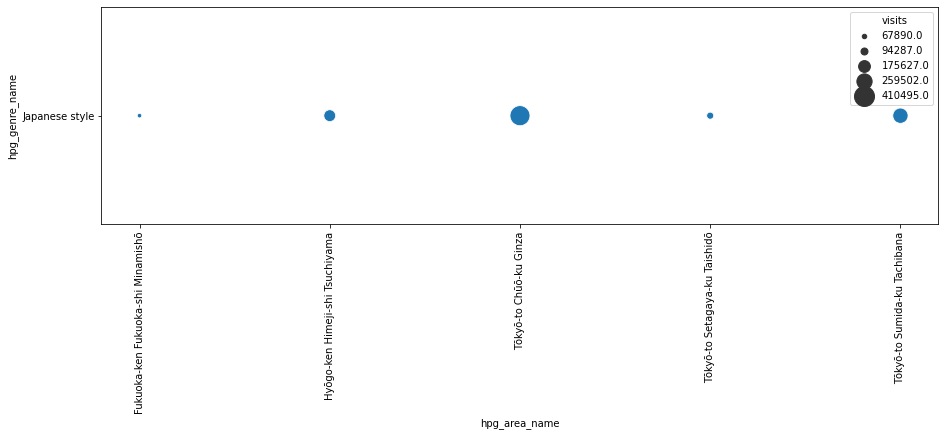

In [31]:
df_stores = df_stores.dropna()
df_stores.head(n=150)
df_area_genre = df_stores[["hpg_genre_name", "hpg_area_name", "visits"]].groupby(["hpg_genre_name", "hpg_area_name"], as_index = False).sum()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.scatterplot(data=df_area_genre, x="hpg_area_name", y="hpg_genre_name", size= "visits", sizes=(20, 400), legend="full")

26. #hpg-visits-per-area

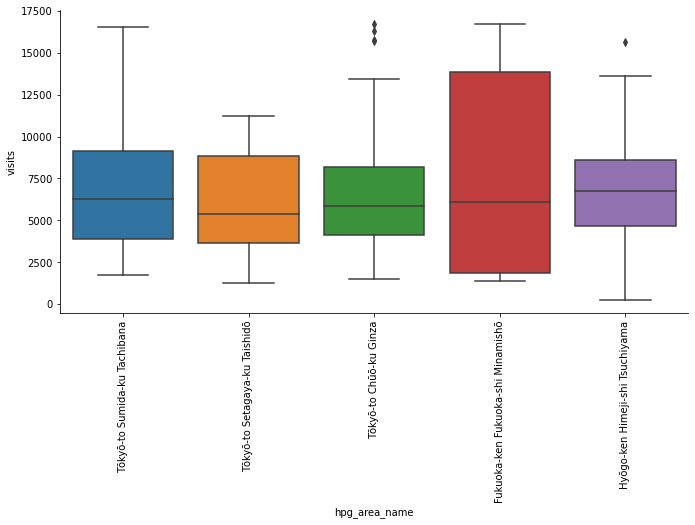

In [32]:
sns.catplot(x = 'hpg_area_name', y = 'visits', kind = "box", data = df_stores, aspect = 2).set_xticklabels(rotation=90)

**Inferences :**
* The 150 stores correspond to only 5 areas, with Minimisho having the highest spread of visitors.
* When we plotted the scatter-plot, Ginza, the third area, seemed to be the highest but here we can see it's due to outliers.

# **Feature Engineering**

In [33]:
air_visits = pd.read_csv("../input/restaurant-visitor-forecasting/train.csv")
air_reservations = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/air_reserve.csv")
hpg_reservations = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/hpg_reserve.csv")
air_stores = pd.read_csv("../input/restaurant-visitor-forecasting/MetaData/MetaData/air_store_info.csv")
date_data = pd.read_csv("/kaggle/input/restaurant-visitor-forecasting/MetaData/MetaData/date_info.csv")
test = pd.read_csv("/kaggle/input/restaurant-visitor-forecasting/test.csv")

Removing part of 2016 Data. From index 47699, i.e. dates after July 1, 2016 follow the periodic trend.  

In [34]:
air_visits = air_visits.sort_values('visit_date').reset_index(drop = True).iloc[47699:,:]

In [35]:
date_copy = date_data.copy()

The dates are in order, so the next_holiday_flg will just be the holiday_flg column shifted 1 down.

In [36]:
hol_date = date_copy["holiday_flg"].copy()
#Drop the first row of the holiday_flg column
hol_date.drop(hol_date.head(1).index, inplace = True)
hol_date.loc[len(hol_date)+1] = 0 #Add a row at the end of the data

In [37]:
hol_date.reset_index(drop = True, inplace = True)

In [38]:
date_copy["next_day_holiday_flg"] = hol_date

Since there is a consistency in the store ids of the air_visits and the air_stores, merge them.

In [39]:
df1 = air_visits.copy()

df1 = df1.merge(air_stores, on="air_store_id")

In [40]:
df1 = df1.merge(date_copy, left_on="visit_date", right_on="calendar_date")

In [41]:
df1.drop("calendar_date", axis = 1, inplace = True)

Adding a size feature to check the local competition.

In [42]:
air_competition = air_stores.groupby(["air_genre_name", "air_area_name"], as_index = False).size()

In [43]:
df1 = df1.merge(air_competition, on = ["air_genre_name", "air_area_name"])

In [44]:
df1.sort_values(by = ['visit_date']).reset_index()

,index,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,next_day_holiday_flg,size
0,0,air_c1ff20617c54fee7,2016-07-01,12,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,139.698171,Friday,0,0,5
1,89495,air_56ea46c14b2dd967,2016-07-01,47,Cafe/Sweets,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Friday,0,0,4
2,89494,air_b162fb07fbbdea33,2016-07-01,23,Cafe/Sweets,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Friday,0,0,4
3,89493,air_70f834596eb99fee,2016-07-01,28,Cafe/Sweets,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Friday,0,0,4
4,89492,air_464a62de0d57be1e,2016-07-01,12,Cafe/Sweets,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Friday,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
191969,25361,air_93b9bb641f8fc982,2017-04-07,31,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,Friday,0,0,2
191970,166693,air_ced6297e5bdf5130,2017-04-07,22,Izakaya,Tōkyō-to Setagaya-ku Sangenjaya,35.642962,139.670038,Friday,0,0,2
191971,153133,air_c92745dfdd2ec68a,2017-04-07,15,Bar/Cocktail,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,Friday,0,0,4
191972,53395,air_9f277fb7a2c1d842,2017-04-07,8,Dining bar,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Friday,0,0,9


Parsing visit date.

In [45]:
df1['visit_date'] = pd.to_datetime(df1['visit_date'],format='%Y-%m-%d')
df1['month'] = df1['visit_date'].dt.month
df1['year'] = df1['visit_date'].dt.year
df1['dow'] = df1['visit_date'].dt.dayofweek

Label encoding for area and genre based on the number of visitors

In [46]:
col = "air_area_name"
area_encode = df1.groupby(col, as_index = False)['visitors'].sum().sort_values(by = "visitors").reset_index(drop = True)
print(area_encode)
area_encode["area_index_col"] = range(1, len(area_encode) + 1)
area_encode.drop(columns = "visitors", inplace = True)

df1 = df1.merge(area_encode, on = "air_area_name")
df1.drop(columns = "air_area_name", inplace = True)

col = "air_genre_name"
genre_encode = df1.groupby(col, as_index = False)['visitors'].sum().sort_values(by = "visitors").reset_index(drop = True)
print(genre_encode)
genre_encode["genre_index_col"] = range(1, len(genre_encode) + 1)
genre_encode.drop(columns = "visitors", inplace = True)

df1  = df1.merge(genre_encode, on = "air_genre_name")
df1.drop(columns = "air_genre_name", inplace = True)

                            air_area_name  visitors
0           Tōkyō-to Setagaya-ku Kitazawa      2056
1             Hokkaidō Katō-gun Motomachi      2318
2          Ōsaka-fu Neyagawa-shi Honmachi      3169
3    Tōkyō-to Shinagawa-ku Higashigotanda      3823
4             Tōkyō-to Shibuya-ku Higashi      3879
..                                    ...       ...
98               Tōkyō-to Chūō-ku Tsukiji    143095
99         Tōkyō-to Shinjuku-ku Kabukichō    174780
100          Tōkyō-to Minato-ku Shibakōen    224640
101           Tōkyō-to Shibuya-ku Shibuya    276024
102        Fukuoka-ken Fukuoka-shi Daimyō    309108

[103 rows x 2 columns]
                  air_genre_name  visitors
0          International cuisine      8606
1                  Karaoke/Party     14294
2                          Asian     17504
3   Okonomiyaki/Monja/Teppanyaki     65985
4               Creative cuisine     75439
5                   Western food     81396
6           Yakiniku/Korean food    113951
7       

Adds min mean max median count_observations for all the unique stores.

In [47]:
unique_stores = test['air_store_id'].unique()
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

In [48]:
tmp = df1.groupby(['air_store_id','dow'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df1.groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df1.groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df1.groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df1.groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 

In [49]:
df1 = pd.merge(df1, stores, how='left', on=['air_store_id','dow'])

One hot encoding day of the week.

In [50]:
df1_encoded = pd.get_dummies(data = df1, columns = ["dow"], prefix = ["dow"])
df1_encoded.drop(columns = "day_of_week", inplace = True)

Mapping hpg store IDs to their corresponding air store IDs

In [51]:
hpg_reservations = pd.merge(hpg_reservations, store_IDs, how='inner', on=['hpg_store_id'])

Preprocessing air reservations data.

In [52]:
air_reservations['visit_datetime'] = pd.to_datetime(air_reservations['visit_datetime'])
air_reservations['visit_date'] = air_reservations['visit_datetime'].dt.date
air_reservations['reserve_datetime'] = pd.to_datetime(air_reservations['reserve_datetime'])
air_reservations['time_diff'] = air_reservations.apply(lambda x: (x['visit_datetime'] - x['reserve_datetime']).days, axis=1)
air_reservations = air_reservations.groupby(['air_store_id', 'visit_date'], as_index=False)[['time_diff', 'reserve_visitors']].sum()

Preprocessing hpg reservations data.

In [53]:
hpg_reservations['visit_datetime'] = pd.to_datetime(hpg_reservations['visit_datetime'])
hpg_reservations['visit_date'] = hpg_reservations['visit_datetime'].dt.date
hpg_reservations['reserve_datetime'] = pd.to_datetime(hpg_reservations['reserve_datetime'])
hpg_reservations['time_diff'] = hpg_reservations.apply(lambda x: (x['visit_datetime'] - x['reserve_datetime']).days, axis=1)
hpg_reservations = hpg_reservations.groupby(['air_store_id', 'visit_date'], as_index=False)[['time_diff', 'reserve_visitors']].sum()

In [54]:
df1_encoded['visit_date'] = df1_encoded['visit_date'].dt.date

Merging both air and hpg reservation data.

In [55]:
df1_encoded = pd.merge(df1_encoded, air_reservations, how='left', on=['air_store_id','visit_date'])

In [56]:
df1_encoded = pd.merge(df1_encoded, hpg_reservations, how='left', on=['air_store_id','visit_date'])

In [57]:
y = df1_encoded['visitors']

In [58]:
X = df1_encoded.drop(columns = "visitors",axis = 1)

In [59]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error as msle
import gc

# Create training / validation split
split = 179000
train, y_train, x_valid, y_valid = X[:split], y[:split], X[split:], y[split:]

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse

def RMSLE(actual, pred):
    return mse(actual, pred)**0.5

# **Model Training And Hyperparameter Tuning**

## **XGB**

### Tuning Hyperparameters

In [61]:
# import hyperopt
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
#         'gamma': hp.uniform ('gamma', 0,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 500
#     }

In [62]:
# # Regression: 
# def hyperparameter_tuning(space):
#     model=XGBRegressor(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                          reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
#                          colsample_bytree=space['colsample_bytree'], learning_rate = 0.01)
    
# #     evaluation = [( x_train, y_train), ( x_test, y_test)]
#     col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors', 'latitude', 'longitude']]
    
#     model.fit(train[col], np.log1p(y_train.values))
#     y_pred = model.predict(x_valid[col])
    
#     rmsle_score = RMSLE(np.log1p(y_valid.values), y_pred)
#     print('RMSE XGBRegressor: ', rmsle_score)
    
#     #change the metric if you like
#     return {'loss': rmsle_score, 'status': STATUS_OK, 'model': model}

In [63]:
# trials = Trials()
# best = fmin(fn=hyperparameter_tuning,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=10)

# print("Hyperopt estimated optimum {}".format(best))

### Training

In [64]:

# # xgb = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=280, subsample=0.8, 
# #                       colsample_bytree=0.8, max_depth =12)

# xgb_m = xgb.XGBRegressor(
#     max_depth=8,
#     learning_rate=0.01,
#     n_estimators=500,
#     gamma=0,
#     min_child_weight=1,
#     subsample=1,
#     colsample_bytree=1,
#     scale_pos_weight=1,
#     seed=24,verbosity = 1)

# xgb_m.fit(train[col], np.log1p(y_train.values))

# x_valid_xgb = x_valid.copy()

# x_valid_xgb.drop(columns = ['air_store_id', 'visit_date', 'latitude', 'longitude'], inplace = True)

# y_pred = xgb_m.predict(x_valid_xgb)

# print('RMSE XGBRegressor: ', RMSLE(np.log1p(y_valid.values), y_pred))

## LGBM

### Tuning Hyperparameters

In [65]:
# import hyperopt
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# space={
#        'sub_feature': hp.uniform('sub_feature', 0.5,1),
#         'min_data': hp.quniform ('min_data', 40,200,1),
#         'num_leaves': hp.quniform('num_leaves', 40, 200, 1),
#         'n_estimators': 500,
#     }

In [66]:
# # Regression: 
# from lightgbm import LGBMRegressor

# def hyperparameter_tuning(space):
#     params = {
#         'learning_rate': 0.02,
#         'boosting_type': 'gbdt',
#         'objective': 'regression',
#         'metric': 'rmse',
#         'sub_feature': space['sub_feature'],
#         'num_leaves': int(space['num_leaves']),
#         'min_data': int(space['min_data']),
#         'min_hessian': 1,
#         'verbose': -1,
#         'n_estimators': 500,
#     }

#     model = LGBMRegressor(**params)
    
# #     evaluation = [( x_train, y_train), ( x_test, y_test)]
#     col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors', 'latitude', 'longitude']]
    
#     model.fit(train[col], np.log1p(y_train.values))
#     y_pred = model.predict(x_valid[col])
    
#     rmsle_score = RMSLE(np.log1p(y_valid.values), y_pred)
#     print('RMSE LGBMRegressor: ', rmsle_score)
    
#     #change the metric if you like
#     return {'loss': rmsle_score, 'status': STATUS_OK, 'model': model}

In [67]:
# trials = Trials()
# best = fmin(fn=hyperparameter_tuning,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50)

# print("Hyperopt estimated optimum {}".format(best))

### Training

In [68]:
from lightgbm import LGBMRegressor

#Stoping the model from learning from weird useless columns
col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors', 'latitude', 'longitude']]

# xgb = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=280, subsample=0.8, 
#                       colsample_bytree=0.8, max_depth =12)

params = {
    'learning_rate': 0.02,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'sub_feature': 0.5417895574997428,
    'num_leaves': 105,
    'min_data': 42,
    'min_hessian': 1,
    'verbose': -1,
    'n_estimators': 500,
}

lgbm_m = LGBMRegressor(**params)

lgbm_m.fit(train[col], np.log1p(y_train.values))
# xgb_m.fit(train[col], np.log1p(y_train.values))

y_pred_train = lgbm_m.predict(train[col])
y_pred = lgbm_m.predict(x_valid[col])

print('RMSE LGBRegressor train: ', RMSLE(np.log1p(y_train.values), y_pred_train))
print('RMSE LGBRegressor test: ', RMSLE(np.log1p(y_valid.values), y_pred))

RMSE LGBRegressor train:  0.4753905758729486
RMSE LGBRegressor test:  0.4821326149617588


## KNN Model

In [69]:
col1 = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors', 'latitude', 'longitude','time_diff_x','reserve_visitors_x','time_diff_y','reserve_visitors_y']]

### Tuning Hyperparameters

In [70]:
# from sklearn.neighbors import KNeighborsRegressor

# for k in range(1, 200):
#     knn_m = KNeighborsRegressor(n_neighbors=k)

#     knn_m.fit(train[col1], np.log1p(y_train.values))

#     x_valid_knn = x_valid.copy()

#     x_valid_knn.drop(columns = ['air_store_id', 'visit_date', 'latitude', 'longitude'], inplace = True)

#     y_pred = knn_m.predict(x_valid_knn)

#     rmse = RMSLE(np.log1p(y_valid.values), y_pred)
#     errs.append(rmse)
#     print('for k = ',k,'  RMSE : ', rmse)

### Training 

In [71]:
# from sklearn.neighbors import KNeighborsRegressor

# knn_m = KNeighborsRegressor(n_neighbors=170)

# knn_m.fit(train[col1], np.log1p(y_train.values))

# x_valid_knn = x_valid.copy()

# x_valid_knn.drop(columns = ['air_store_id', 'visit_date', 'latitude', 'longitude','time_diff_x','reserve_visitors_x','time_diff_y','reserve_visitors_y'], inplace = True)

# y_pred = knn_m.predict(x_valid_knn)

# rmse = RMSLE(np.log1p(y_valid.values), y_pred)
# # errs.append(rmse)
# print('RMSE KNN: ', rmse)

# Preprocessing the test data!

In [72]:
# print(y_valid)
# print(y_pred)

X

,air_store_id,visit_date,latitude,longitude,holiday_flg,next_day_holiday_flg,size,month,year,area_index_col,...,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,time_diff_x,reserve_visitors_x,time_diff_y,reserve_visitors_y
0,air_c1ff20617c54fee7,2016-07-01,35.641463,139.698171,0,0,5,7,2016,92,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
1,air_d500b48a8735fbd3,2016-07-01,35.641463,139.698171,0,0,5,7,2016,92,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
2,air_a271c9ba19e81d17,2016-07-01,35.641463,139.698171,0,0,5,7,2016,92,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
3,air_fbadf737162a5ce3,2016-07-01,35.641463,139.698171,0,0,5,7,2016,92,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
4,air_c1ff20617c54fee7,2016-07-02,35.641463,139.698171,0,0,5,7,2016,92,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191969,air_c8fe396d6c46275d,2017-01-01,43.055460,141.340956,1,1,2,1,2017,93,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
191970,air_c8fe396d6c46275d,2017-01-02,43.055460,141.340956,1,1,2,1,2017,93,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
191971,air_7514d90009613cd6,2017-01-02,43.055460,141.340956,1,1,2,1,2017,93,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
191972,air_c8fe396d6c46275d,2017-01-03,43.055460,141.340956,1,0,2,1,2017,93,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN


In [73]:
test = pd.read_csv("/kaggle/input/restaurant-visitor-forecasting/test.csv")

In [74]:
test_copy = test.copy()

In [75]:
test_copy = test_copy.merge(air_stores, on="air_store_id")

In [76]:
test_copy = test_copy.merge(date_copy, left_on="visit_date", right_on="calendar_date")

In [77]:
test_copy.drop("calendar_date", axis = 1, inplace = True)

In [78]:
test_copy = test_copy.merge(air_competition, on = ["air_genre_name", "air_area_name"])

In [79]:
test_copy['visit_date'] = pd.to_datetime(test_copy['visit_date'],format='%Y-%m-%d')
test_copy['month'] = test_copy['visit_date'].dt.month
test_copy['year'] = test_copy['visit_date'].dt.year
test_copy['dow'] = test_copy['visit_date'].dt.dayofweek

In [80]:
test_copy  = test_copy.merge(area_encode, on = "air_area_name")
test_copy  = test_copy.merge(genre_encode, on = "air_genre_name")

In [81]:
# test_copy  = test_copy.merge(dow_encode, on = "day_of_week")
test_copy = pd.merge(test_copy, stores, how='left', on=['air_store_id','dow'])

test_copy = test_copy.fillna(-1)

In [82]:
test_copy = pd.get_dummies(data = test_copy, columns = ["dow"], prefix = ["dow"])

In [83]:
test_copy['visit_date'] = test_copy['visit_date'].dt.date

In [84]:
test_copy = pd.merge(test_copy, air_reservations, how='left', on=['air_store_id','visit_date'])
test_copy = pd.merge(test_copy, hpg_reservations, how='left', on=['air_store_id','visit_date'])

In [85]:
test_copy.drop(columns = ["day_of_week", "air_area_name", "air_genre_name"], inplace = True)
# test_copy.drop(columns = ["next_day_holiday_flg", "size"], inplace = True)

In [86]:
col = [c for c in test_copy if c not in ['id', 'air_store_id', 'visit_date','visitors', 'longitude', 'latitude']]


In [87]:
col1 = [c for c in test_copy if c not in ['id', 'air_store_id', 'visit_date','visitors', 'longitude', 'latitude','time_diff_x','reserve_visitors_x','time_diff_y','reserve_visitors_y']]

In [88]:
# p_test = xgb_m.predict(test_copy[col])
p1_test = lgbm_m.predict(test_copy[col])
# p2_test = knn_m.predict(test_copy[col1])

# p3_test = 0.16*p_test + 0.84*p1_test    #Ensemble

test_copy["id"] = pd.DataFrame(test_copy["air_store_id"] + "_" + test_copy['visit_date'].astype(str))
# test_copy["visitors"] = np.expm1(p_test)
test_copy["visitors"] = np.expm1(p1_test)
# test_copy["visitors"] = np.expm1(p2_test)
# test_copy["visitors"] = np.expm1(p3_test)
# test_copy["visitors"] = p_test

In [89]:
test_copy[['id','visitors']]

,id,visitors
0,air_e3020992d5fe5dfd_2017-04-06,8.018757
1,air_08ef81d5b7a0d13f_2017-04-06,12.544541
2,air_9152d9926e5c4a3a_2017-04-06,39.450093
3,air_73f316e6a18d8aa9_2017-04-06,24.237726
4,air_310e467e6e625004_2017-04-06,13.043663
...,...,...
12430,air_c8fe396d6c46275d_2017-04-16,23.507507
12431,air_7514d90009613cd6_2017-04-16,62.138490
12432,air_7514d90009613cd6_2017-04-02,62.138490
12433,air_7514d90009613cd6_2017-04-05,19.457147


In [90]:
test_copy[['id','visitors']].to_csv('lgb_reservation_tuned_without_2016.csv', index=False)